# K-Mean (Clustering)

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Pre-Defined Parameters

In [2]:
NUM_OF_CLUSTERS = 3


# Read Data

In [3]:
df = pd.read_csv("./dataset.csv")
df.head(20)

,Name,Age,Salary
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


# Plot the Data between Age and Salary

Text(0, 0.5, 'Salary')

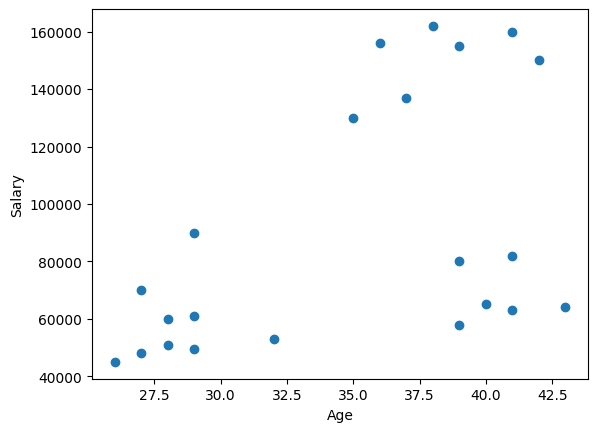

In [4]:
plt.scatter(df["Age"], df["Salary"])
plt.xlabel("Age")
plt.ylabel("Salary")


# Create the Model

In [5]:
km_model = KMeans(n_clusters= NUM_OF_CLUSTERS)

# Train the model

In [6]:
y_predicted = km_model.fit_predict( df[[ "Age", "Salary"]])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

# Add the clusters (Results) to the main dataframe

In [7]:
df["cluster"] = y_predicted
df.head(10)

,Name,Age,Salary,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


# Split the rows based on the clusters into different dataframes

In [8]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

# Cluster Centers (Centriods)

In [1]:
km_model.cluster_centers_


NameError: name 'km_model' is not defined

# Plot the  Clusters 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


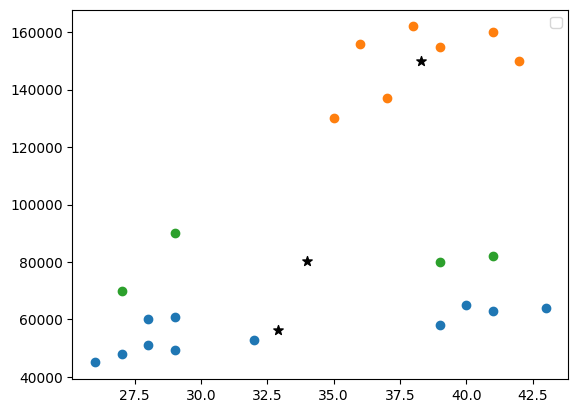

In [10]:
plt.scatter(  df1["Age"], df1["Salary"] )
plt.scatter(  df2["Age"], df2["Salary"] )
plt.scatter(  df3["Age"], df3["Salary"] )


plt.scatter( km_model.cluster_centers_[:,0] ,  # x-values
             km_model.cluster_centers_[:,1] ,  # y-values
             color ="black",
             marker = "*"  ,
             s = 50         
)


plt.legend()

# Scaling the numerical data 

In [11]:
scaler = MinMaxScaler(feature_range = (0, 1) )


# Column Age
scaler.fit(df[["Age"]])  # calculate
df["Age"] = scaler.transform(df[["Age"]]) # change


# Column Salary
scaler.fit(df[["Salary"]])  # calculate
df["Salary"] = scaler.transform(df[["Salary"]]) # change



In [12]:
df.head()

,Name,Age,Salary,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


# Retrain the model using the scaled Data

In [13]:
km_model = KMeans(n_clusters= NUM_OF_CLUSTERS)

Text(0, 0.5, 'Salary')

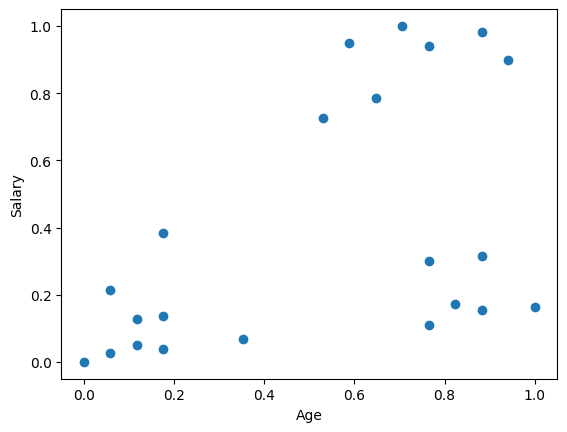

In [14]:
# Plot again the raw data 
plt.scatter(df["Age"], df["Salary"])
plt.xlabel("Age")
plt.ylabel("Salary")


In [15]:
# retrain the model using the scaled Data Frame

y_predicted = km_model.fit_predict( df[[ "Age", "Salary"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [16]:
df["cluster"] = y_predicted

In [17]:
df.head()

,Name,Age,Salary,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [18]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


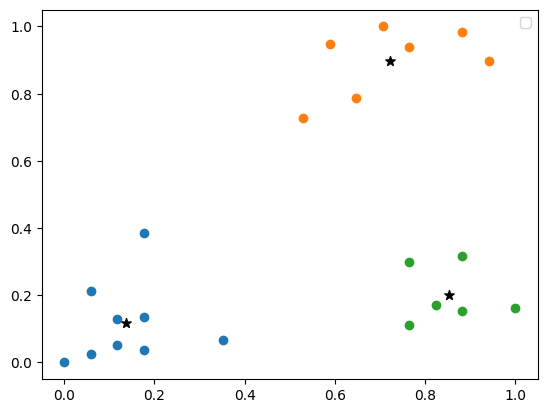

In [19]:
plt.scatter(  df1["Age"], df1["Salary"] )
plt.scatter(  df2["Age"], df2["Salary"] )
plt.scatter(  df3["Age"], df3["Salary"] )


plt.scatter( km_model.cluster_centers_[:,0] ,
             km_model.cluster_centers_[:,1] ,
             color ="black",
             marker = "*"  ,
             s = 50         
)


plt.legend()